In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import matplotlib.patches as mpatches
from scipy.stats import wilcoxon

In [81]:
def plot_violin_hk_model(dataName,ax):
  data = scipy.io.loadmat('./HK_in_model/'+dataName+'/HK_model.mat')
  thrs = ['LT2','LocalGiniModels','StanDep']
  mems= ['FASTCORE','MBA','iMAT','INIT','GIMME','mCADRE']
  Ths,HK_rec,MeM=[],[],[]

  for t in thrs:
    for m in mems:
      for c in data[t+'_'+m][0]:
        Ths.append(t)
        HK_rec.append(c)
        MeM.append(m)
  df=pd.DataFrame()
  df['Ths']=Ths
  df['HK_rec']=HK_rec
  df['MeM']=MeM
  
  pal1={'LocalGiniModels':'g','LT2':'darkorange','StanDep':'royalblue'}
  sns.violinplot(x="MeM", y="HK_rec", hue="Ths",alpha=0.8,hue_order=['LocalGiniModels','LT2','StanDep'],ax=ax,
                  data=df,palette=pal1,width=0.7, inner_kws={'box_width':3})
  ax.set_ylim(-0.1,1.3)
  dist=0.24
  for i in range(6):
    ax.plot([i,i],[-0.1,1.3],c='lightgray',linewidth=0.5,zorder=0)
    ax.plot([i-dist,i-dist],[-0.1,1.3],c='lightgray',linewidth=0.5,zorder=0)
    ax.plot([i+dist,i+dist],[-0.1,1.3],c='lightgray',linewidth=0.5,zorder=0)
  ax.set_xticks(ax.get_xticks())
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,fontweight='bold')
  ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
  ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0,1.2],fontweight='bold',fontsize=15)
  ax.set_xlabel('MeM',fontweight='bold',fontsize=15)
  ax.set_ylabel('Fraction of housekeeping reactions present in the \n CSMs built using '+dataName+' data',fontweight='bold',fontsize=15)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  h, l = ax.get_legend_handles_labels()
  ax.legend(h, ['Localgini', 'LocalT2', 'StanDep'],fontsize=18,loc='upper right')
  for i in range(6):
    ax.plot([i-dist,i-dist,i,i],[0.02,0,0,0.02],lw=1.5,color='black')
    ax.plot([i-dist,i-dist,i+dist,i+dist],[-0.04,-0.06,-0.06,-0.04],lw=1.5,color='black')
    lg_ = df[(df['Ths']=='LocalGiniModels') & (df['MeM']==mems[i])]['HK_rec'].values
    lt2_ = df[(df['Ths']=='LT2') & (df['MeM']==mems[i])]['HK_rec'].values
    sd_ = df[(df['Ths']=='StanDep') & (df['MeM']==mems[i])]['HK_rec'].values
    p_lg_lt2 = wilcoxon(lg_,lt2_,alternative='greater')
    p_lg_sd = wilcoxon(lg_,sd_,alternative='greater')
    if p_lg_lt2.pvalue<0.01:
      ax.text(i-dist/2,-0.035,'*', fontsize=15)
    else:
      ax.text(i-dist/2,-0.035,'ns', fontsize=15)
    if p_lg_sd.pvalue<0.01:
      ax.text(i,-0.095,'*', fontsize=15,horizontalalignment='center')
    else:
      ax.text(i,-0.095,'ns', fontsize=15,horizontalalignment='center')


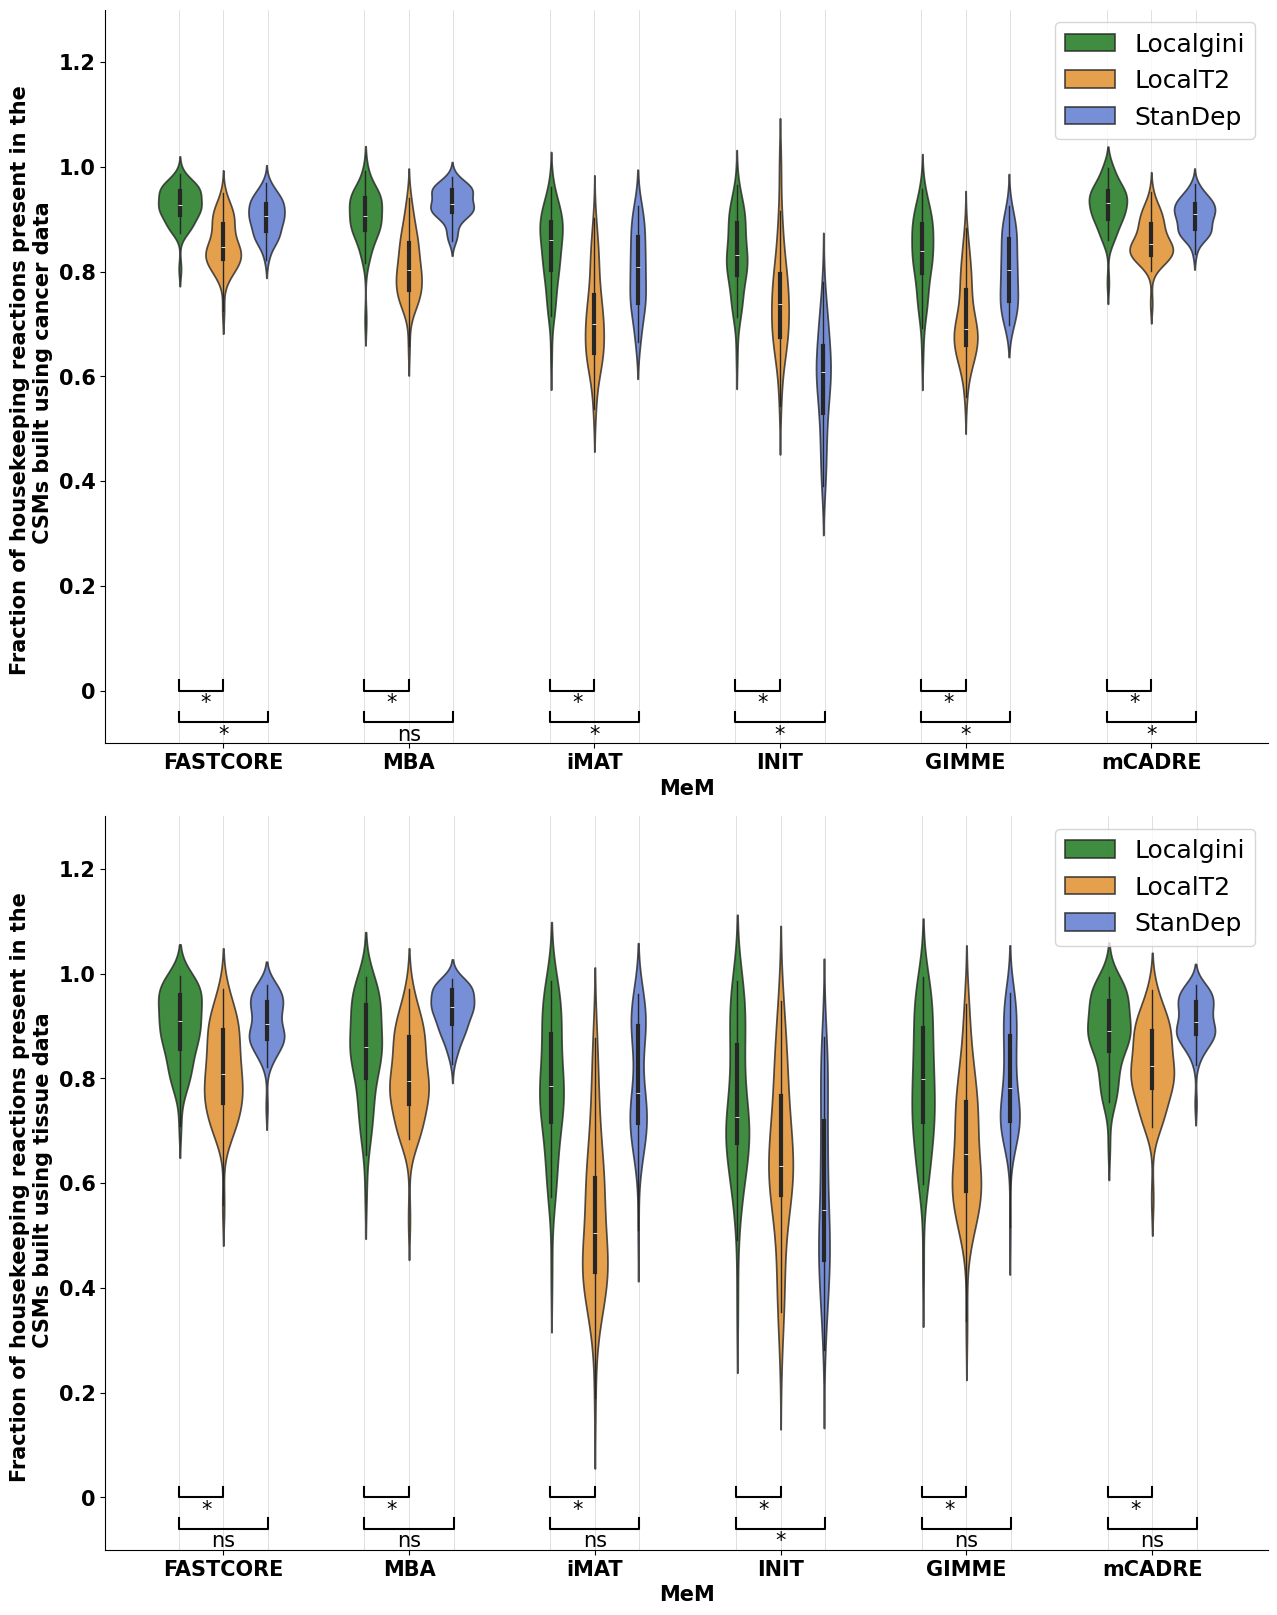

In [82]:
fig,ax=plt.subplots(2,1,figsize=(15,20),gridspec_kw={'hspace':0.1})
plot_violin_hk_model('cancer',ax[0])
plot_violin_hk_model('tissue',ax[1])
plt.savefig('HK_model_rec.pdf')